<a href="https://colab.research.google.com/github/newtonis/PASA/blob/master/TP1_PASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import clear_output
! wget "https://raw.githubusercontent.com/newtonis/PASA/master/data/H-H1_LOSC_4_V2-1126259446-32.hdf5"
! wget "https://raw.githubusercontent.com/newtonis/PASA/master/data/L-L1_LOSC_4_V2-1126259446-32.hdf5"
! wget "https://raw.githubusercontent.com/newtonis/PASA/master/readligo.py"
clear_output()

In [0]:
import h5py    
import numpy as np    
import pandas as pd
import readligo as rl
import matplotlib.pyplot as plt

file_name = "H-H1_LOSC_4_V2-1126259446-32.hdf5"  

strain, time, dq = rl.loaddata(file_name, 'H1')

total_time = time[-1]-time[0]
dt = 0.02

windows_qnt = int(total_time/dt)

n = len(time)// windows_qnt

windows = [time[i:i+n] for i in range(windows_qnt)]
strain_windowed = [strain[i:i+n] for i in range(windows_qnt)]

# falta la ultima parte
windows.append(time[(windows_qnt-1)+n:len(time)]) #agrego lo que faltaba
strain_windowed.append(strain[(windows_qnt-1)+n:len(strain)]) #agrego lo que faltaba


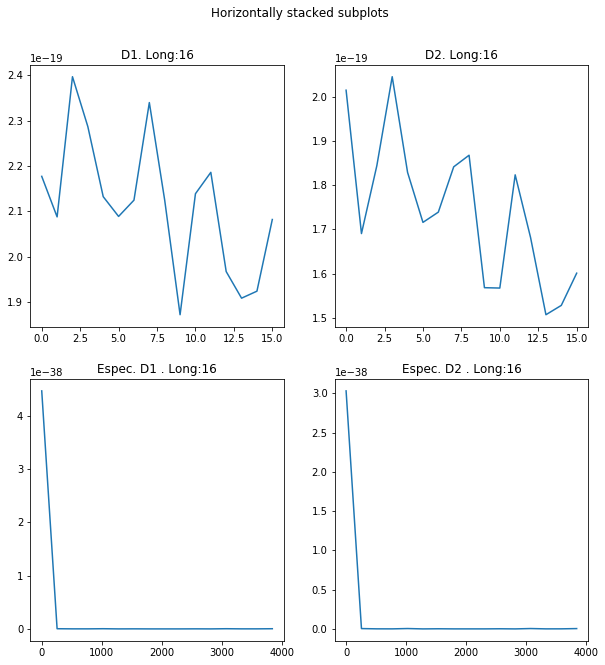

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Horizontally stacked subplots')

N_fft = 2**4
test = strain[0:N_fft]
test2 = strain[N_fft:N_fft*2]
# normalizo la fft
Y = np.fft.fft(test)
Y /= len(Y)
M = [abs(x)**2 for x in Y];

Y = np.fft.fft(test2)
Y /= len(Y)
M2 = [abs(x)**2 for x in Y];


axs[0, 0].plot(range(len(test)),test)
longitud_datos = len(test)
axs[0, 0].title.set_text('D1. Long:'+str(longitud_datos))


axs[0, 1].plot(range(len(test2)),test2)
longitud_datos = len(test2)
axs[0, 1].title.set_text('D2. Long:'+str(longitud_datos))


Fs = 4096
freq_axis = np.arange(0,Fs,Fs/N_fft)
axs[1, 0].plot(freq_axis,M)
longitud_datos = len(M)
axs[1, 0].title.set_text('Espec. D1 . Long:'+str(longitud_datos))

axs[1, 1].plot(freq_axis,M2)
longitud_datos = len(M2)
axs[1, 1].title.set_text('Espec. D2 . Long:'+str(longitud_datos))

left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.2  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.2  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()